# Data Distribution

In this section, we will learn about the shape of data.

## The Tornado Dataset (from NOAA)

Below we import a `DataFrame` containing tornado events from the NOAA storm event database (https://www.ncei.noaa.gov/stormevents/).

The documentation for the dataset is here: https://www.ncdc.noaa.gov/stormevents/details.jsp


In [2]:
import pandas as pd

df = pd.read_csv("tornado_data.csv")
df

,EVENT_ID,CZ_NAME_STR,BEGIN_DATETIME,END_DATETIME,BEGIN_LOCATION,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,...,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE
0,1074279,FRANKLIN CO.,2023-01-03 10:48:00,2023-01-03 10:50:00,PLEASANT GROVE,Tornado,,EF1,0,0,...,SE,3,SE,PLEASANT GROVE,34.5382,-87.8899,34.5439,-87.8821,A tornado touched down just west of Shady Grov...,A quasi-linear convective system progressed ea...
1,1074247,MARENGO CO.,2023-01-03 11:21:00,2023-01-03 11:29:00,OLD SPRING HILL,Tornado,,EF1,0,0,...,SW,3,WNW,ALLENVILLE,32.4151,-87.7827,32.4810,-87.7190,National Weather Service meteorologists survey...,A long-duration severe weather event occurred ...
2,1074249,HALE CO.,2023-01-03 11:29:00,2023-01-03 11:33:00,GALLION,Tornado,,EF0,0,0,...,SW,1,ESE,PRAIRIEVILLE,32.4810,-87.7190,32.5108,-87.6826,National Weather Service meteorologists survey...,A long-duration severe weather event occurred ...
3,1074259,PERRY CO.,2023-01-03 12:10:00,2023-01-03 12:11:00,FOLSOM,Tornado,,EF1,0,0,...,E,3,E,FOLSOM,32.6835,-87.3491,32.6848,-87.3469,National Weather Service meteorologists survey...,A long-duration severe weather event occurred ...
4,1074270,BIBB CO.,2023-01-03 12:41:00,2023-01-03 12:45:00,ACTIVE,Tornado,,EF0,0,0,...,WSW,2,W,ACTIVE,32.8493,-87.0548,32.8737,-87.0158,National Weather Service meteorologists survey...,A long-duration severe weather event occurred ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,1170327,GOSHEN CO.,2024-04-25 14:15:00,2024-04-25 14:25:00,HUNTLEY,Tornado,,EFU,0,0,...,ESE,4,E,HUNTLEY,41.9200,-104.0900,41.9304,-104.0787,Numerous reports of a funnel cloud with occasi...,Numerous strong to severe thunderstorms develo...
3206,1182130,GOSHEN CO.,2024-06-20 13:45:00,2024-06-20 14:00:00,FONDA,Tornado,,EFU,0,0,...,WSW,4,WSW,FONDA,41.8210,-104.3980,41.8230,-104.3650,A brief tornado was observed in rural Goshen C...,An intense supercell thunderstorm originated n...
3207,1204424,CROOK CO.,2024-08-19 17:12:00,2024-08-19 17:22:00,ALVA,Tornado,,EF1,0,0,...,SSW,8,S,ALVA,44.5776,-104.4974,44.5693,-104.4477,A tornado developed over the Bear Lodge Mounta...,A thunderstorm became severe in northwest Croo...
3208,1216267,SUBLETTE CO.,2024-09-04 14:05:00,2024-09-04 14:06:00,NEW FORK,Tornado,,EF0,0,0,...,WSW,10,WSW,NEW FORK,42.6375,-109.8749,42.6380,-109.8738,The Sublette County emergency manager reported...,An upper-level low moved across Wyoming and br...


Let's see what fields are available.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EVENT_ID             3210 non-null   int64  
 1   CZ_NAME_STR          3210 non-null   object 
 2   BEGIN_DATETIME       3210 non-null   object 
 3   END_DATETIME         3210 non-null   object 
 4   BEGIN_LOCATION       3210 non-null   object 
 5   EVENT_TYPE           3210 non-null   object 
 6   MAGNITUDE            3210 non-null   object 
 7   TOR_F_SCALE          3210 non-null   object 
 8   DEATHS_DIRECT        3210 non-null   int64  
 9   INJURIES_DIRECT      3210 non-null   int64  
 10  DAMAGE_PROPERTY_NUM  3210 non-null   int64  
 11  DAMAGE_CROPS_NUM     3210 non-null   int64  
 12  STATE_ABBR           3210 non-null   object 
 13  CZ_TIMEZONE          3210 non-null   object 
 14  MAGNITUDE_TYPE       3210 non-null   object 
 15  EPISODE_ID           3210 non-null   i

Let's see by year and month how many tornado events occurred.

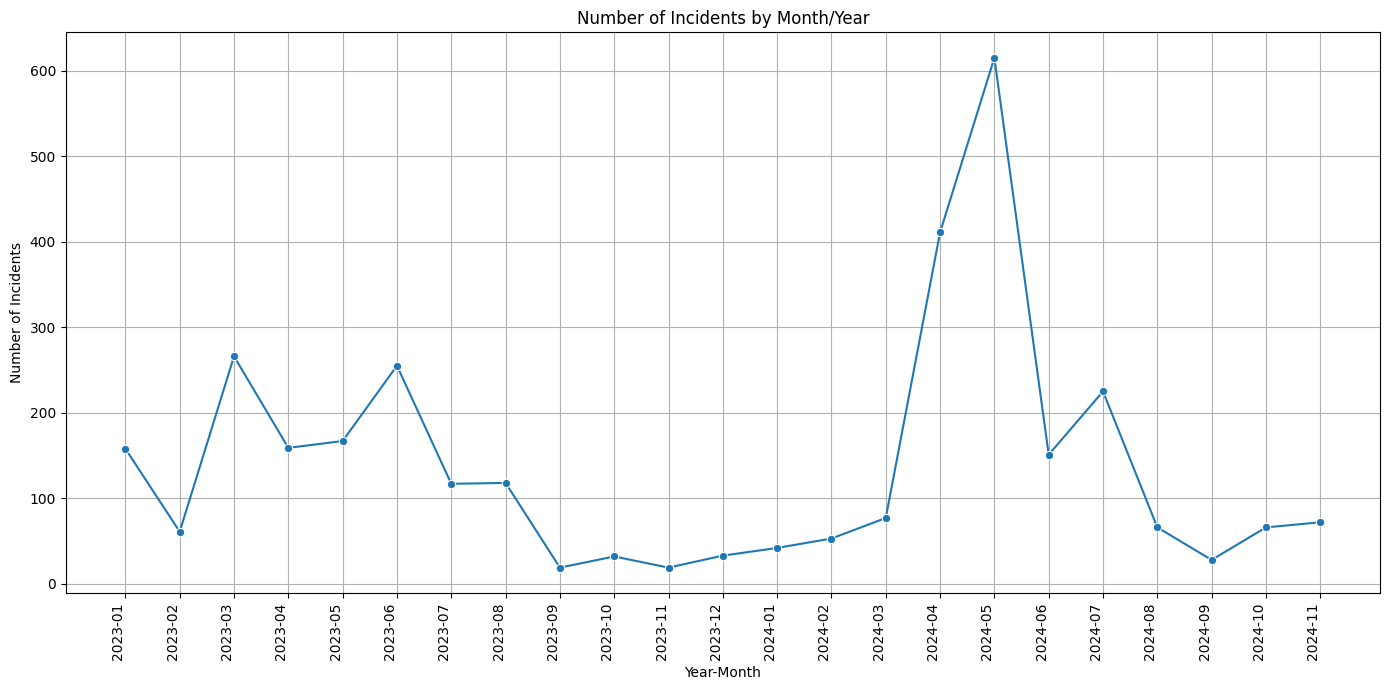

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['BEGIN_DATETIME'] = pd.to_datetime(df['BEGIN_DATETIME'])

# Create a year-month string for grouping
df['YEAR_MONTH'] = df['BEGIN_DATETIME'].dt.to_period('M').astype(str)

# Count incidents per month/year
incidents_by_month = df['YEAR_MONTH'].value_counts().sort_index()

# Plot as a time series line chart
plt.figure(figsize=(14, 7))
sns.lineplot(x=incidents_by_month.index, y=incidents_by_month.values, marker='o')
plt.title('Number of Tornado Incidents by Month/Year')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tornado Incidents')
plt.xticks(rotation=90, ha='right')  # Rotate x-ticks for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that this data covers 2023 and 2024. A large spike of tornados were reported in May of 2024.

We want to understand what tornado widths (in yards) we are most likely to see. Let's grab those values and put them in a NumPy array. Let's also put them in a histogram. Let's try 30 bins. What happens when you increase or decrease the bin size?

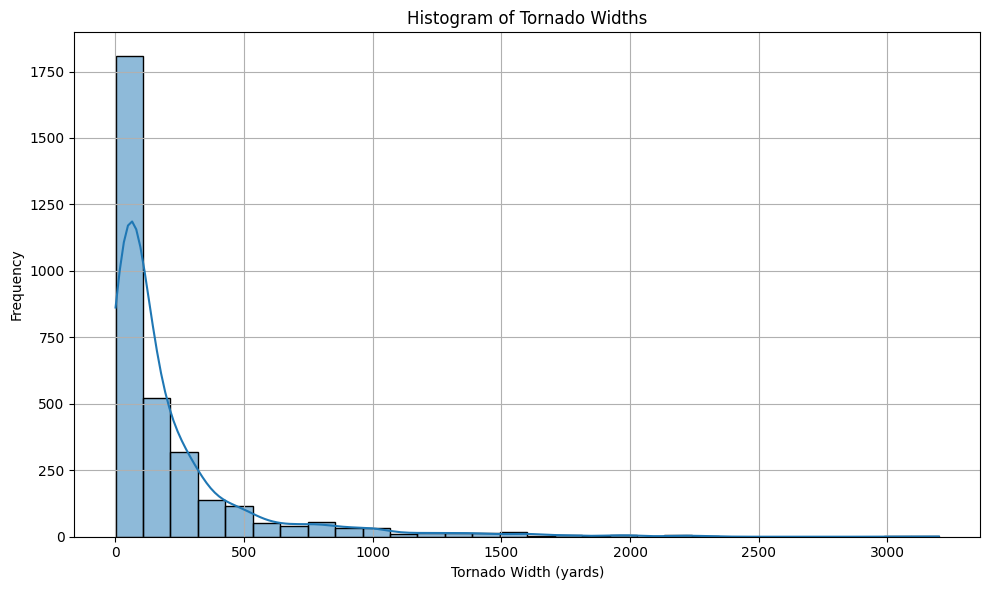

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract tornado widths
tor_width = df['TOR_WIDTH'].values

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(tor_width, bins=30, kde=True)
plt.title('Histogram of Tornado Widths')
plt.xlabel('Tornado Width (yards)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

DISCUSSION: what can we infer about the shape of the data from the above histogram?

<div style="text-align:center; font-size:48px; line-height:1.2;">
|<br>
|<br>
|<br>
↓
</div>

For one, the data is right-skewed heavily. Let's look at the mean, median, standard deviation, and percentiles. **What do you observe?**


In [35]:
print(f"MEAN: {np.mean(tor_width):.2f}")
print(f"MEDIAN: {np.median(tor_width):.2f}")
print(f"STD DEV: {np.std(tor_width, ddof=1):.2f}")

print(f"25th PCT: {np.percentile(tor_width, 25)}")
print(f"75th PCT: {np.percentile(tor_width, 75)}")

MEAN: 215.19
MEDIAN: 100.00
ST DEV: 315.83
25th PCT: 50.0
75th PCT: 250.0


The median is very far from the mean, confirming the skew. We should also note that tornados of smaller diameter seem to be much more common than tornadoes with larger diameters.

Let's create a box plot of the tornado widths. What do you observe? **What do you observe?**

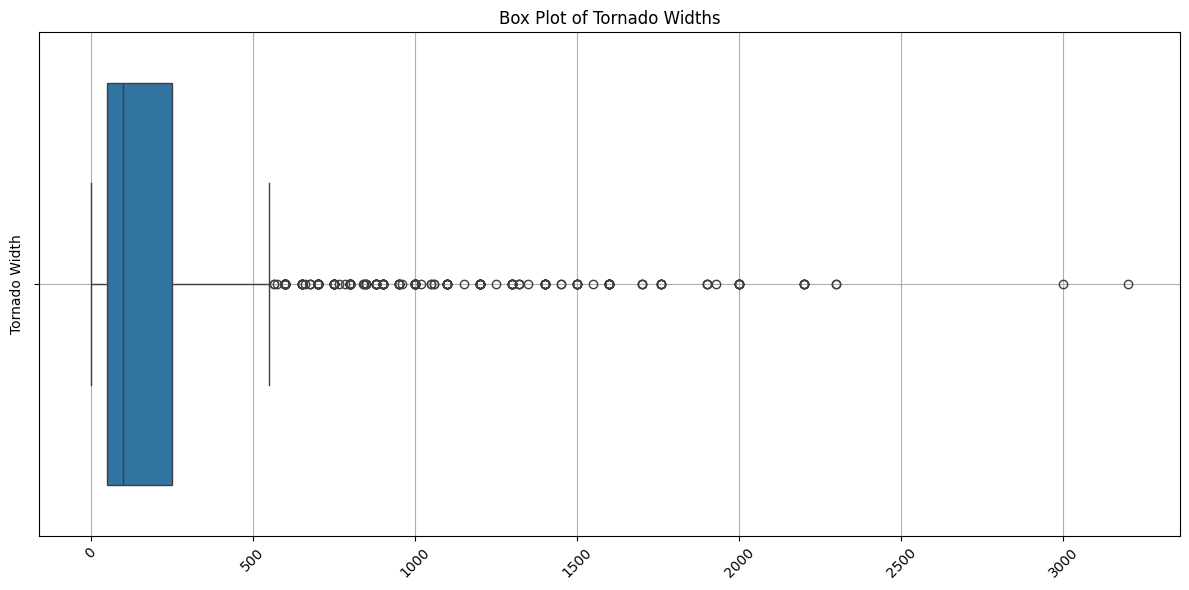

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=tor_width, orient='h', whis=1.5)
plt.title('Box Plot of Tornado Widths')
plt.ylabel('Tornado Width')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Let's break up the box plots by Fujita Scale rating, where EF0 is the least damaging tornado and EF5 is the most damaging. EF5 tornados are highly catastrohpic and thankfully rare, the last occurring in Moore, Okahoma in 2013.

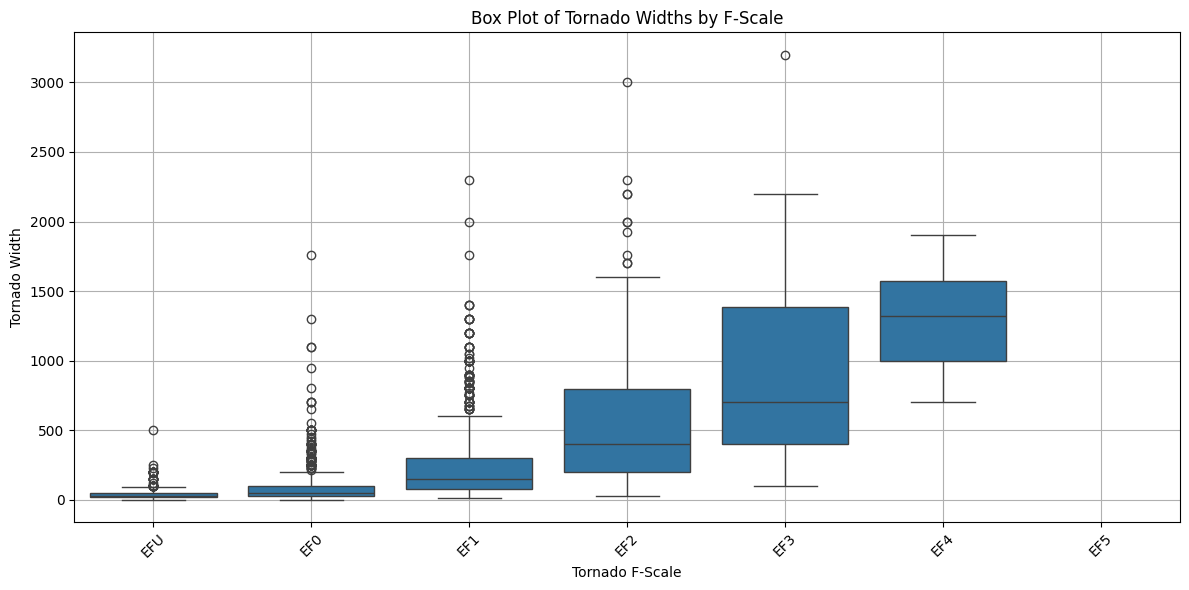

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_tor = df[df['TOR_F_SCALE'].isin(['EFU', 'EF0', 'EF1', 'EF2', 'EF3', 'EF4', 'EF5'])].copy()

# Order the F-scales for proper sorting in the plot
f_scale_order = ['EFU', 'EF0', 'EF1', 'EF2', 'EF3', 'EF4', 'EF5']
df_tor['TOR_F_SCALE'] = pd.Categorical(df_tor['TOR_F_SCALE'],
                                       categories=f_scale_order, ordered=True)

# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='TOR_F_SCALE', y='TOR_WIDTH', data=df_tor)
plt.title('Box Plot of Tornado Widths by F-Scale')
plt.xlabel('Tornado F-Scale')
plt.ylabel('Tornado Width')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()